In [7]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
import xgboost as xgb

In [3]:
data = pd.read_csv('factor_pass9.csv', index_col=0)
data['continuous_count'] = data.groupby((data['evebit'] != data['evebit'].shift(1)).cumsum()).cumcount() + 1
data = data.reindex(columns=data.columns.tolist()[:-2] + ['continuous_count', 'return'])
data.dropna(inplace=True)

insample_data = data.loc[data.loc[:, 'date'] < "2022-01-01", :]
other_info_insample = insample_data.iloc[:, :3]
insample_data_sorted = insample_data.sort_values('date')
insample_data_sorted['rank'] = insample_data_sorted['date'].rank()
sum_of_weight = (insample_data_sorted['rank']).sum()
insample_data_sorted['weight'] = insample_data_sorted['rank'] / sum_of_weight
outdsample_data = data.loc[data.loc[:, 'date'] >= "2022-01-01", :]

X = insample_data_sorted.iloc[:, 3:-3]
y = insample_data_sorted.iloc[:, -3]
other_info_outsample_test = outdsample_data.iloc[:, :3]
X_outsample_test = outdsample_data.iloc[:, 3:-1]
y_outsample_test = outdsample_data.iloc[:, -1]

<Figure size 3000x1800 with 0 Axes>

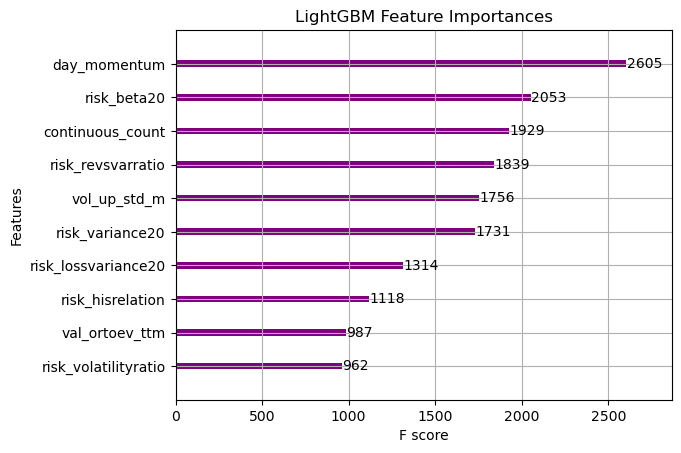

In [25]:
model1 = joblib.load ('./model/lightGBM.pkl')
plt.figure(figsize=(10, 6), dpi = 300)
lgb.plot_importance(model1, max_num_features=10, color = "purple", importance_type = 'split', xlabel = "F score")  # 显示前10个特征的重要性
plt.title('LightGBM Feature Importances')
plt.show()

<Figure size 3000x1800 with 0 Axes>

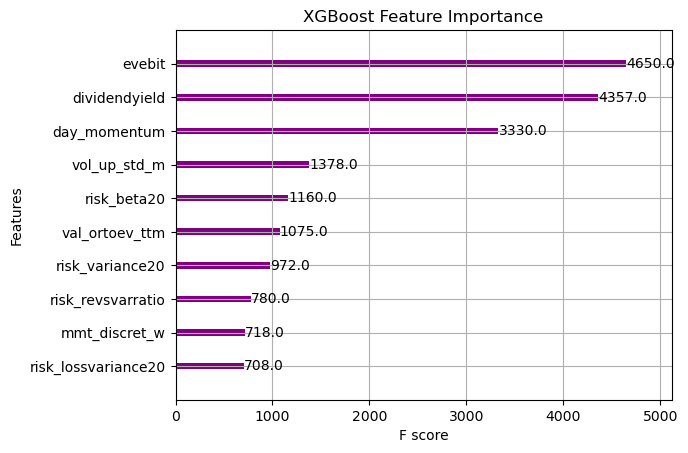

In [24]:
model2 = joblib.load ('./model/XGBoost.pkl')
plt.figure(figsize=(10, 6), dpi = 300)
xgb.plot_importance(model2, max_num_features=10, color = "purple", title = "XGBoost Feature Importance")  # 显示前10个特征的重要性
plt.show()